In [1]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import yfinance as yf
import seaborn as sns
%matplotlib inline

#### Importing data

In [2]:
df=pd.read_pickle('all_banks')

##### Define the start and end dates

In [3]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

#### Separate stock data for each of these

In [4]:
BAC = yf.download("BAC",start,end)
C = yf.download("C",start,end)
GS = yf.download("GS",start,end)
JPM = yf.download("JPM",start,end)
MS = yf.download("MS",start,end)
WFC = yf.download("WFC",start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### List of Tickers

In [5]:
tickers=['BAC','C','GS','JPM','MS','WFC']

#### Concatenating the data frames into a single data frame

In [6]:
bankStocks=pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)


In [7]:
bankStocks.columns.names=['Bank Ticker','Stock Info']

In [8]:
bankStocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827070  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868055  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820232  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840719  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585461  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608501  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700645  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735210  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092323  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369587  11016400  
2006-01-04   31.530001  19.144930  10870000  
2006-01-05   31.495001  19.123676  10158000  
2006-01-06   31.680000  19.236012   8403800  
2006-01-09   31.674999  19.232975   5619600  

[5 rows x 36 columns]

# Exploratory Data analysis

#### Find the Max Close Price for each bank's stock throughout the time period. Method #1

In [9]:
for tick in tickers:
    print(tick, bankStocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


#### Find the Max Close Price for each bank's stock throughout the time period. Method #2

In [10]:
bankStocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Create Empty DataFrame returns for each bank's stocks

In [11]:
returns=pd.DataFrame()

In [12]:
for tick in tickers:
    returns[tick + ' Return']= bankStocks[tick]['Close'].pct_change()

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Create a pairplot of the returns dataframe

C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

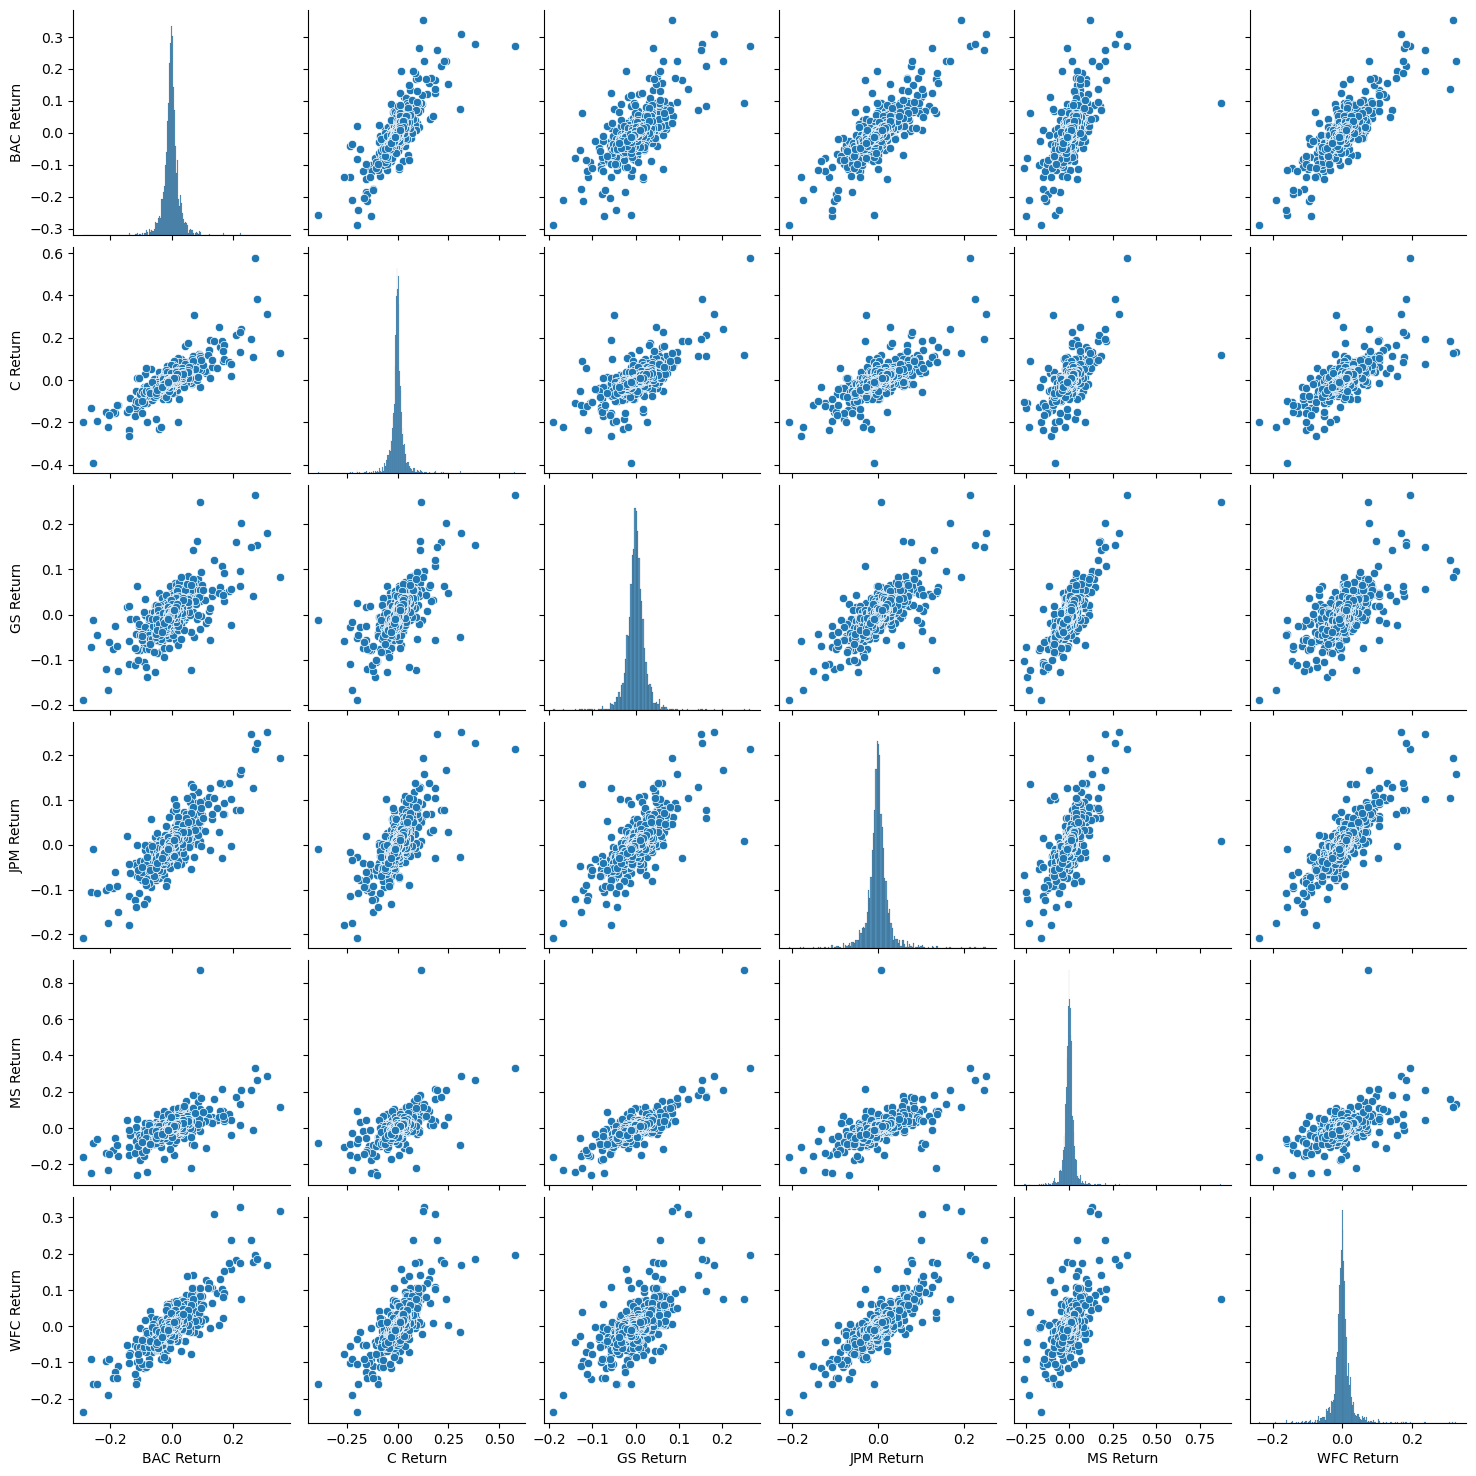

In [14]:
sns.pairplot(returns)

### Minimum Return in the time period 

In [15]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### Maximum Return in the time period 

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

#### Riskiest stock for the time period

In [17]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

#### Riskiest Stock for 2015

In [20]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

### Distplot of the stock returns of Morgan Stanley during 2015

C:\Users\gsingh8\AppData\Local\Temp\ipykernel_27328\239847488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'])
C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MS Return', ylabel='Density'>

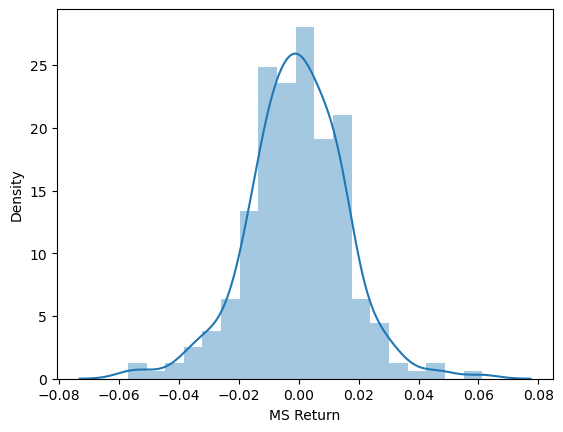

In [26]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'])

#### Distplot of the stock returns of Citi bank during 2008

C:\Users\gsingh8\AppData\Local\Temp\ipykernel_27328\2671847864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'])
C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='C Return', ylabel='Density'>

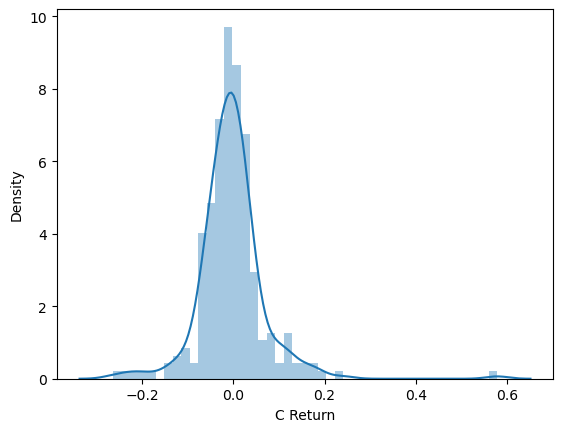

In [32]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'])